In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 11.3 MB/s eta 0:00:00


In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from spellchecker import SpellChecker
import string
import seaborn as sns

In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rcParams

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Loading Data**

In [ ]:
# Load the dataset
dataframe = pd.read_csv('training.tsv', encoding='latin-1', sep='\t')

In [ ]:
dataframe.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [ ]:
dataframe.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Methods**

In [ ]:
# selecting which set to be used 1-8
# in order to combine them all assign set number to 9
def select_set(dataframe,setNumber):
    if setNumber == 9:
        dataframe2 = dataframe[dataframe.essay_set ==1]
        texts = dataframe2['essay']
        scores = dataframe2['domain1_score']
        scores = scores.apply(lambda x: (x*3)/scores.max())
        for i in range(1,9):
            dataframe2 = dataframe[dataframe.essay_set == i]
            texts = texts.append(dataframe2['essay'])
            s = dataframe2['domain1_score']
            s = s.apply(lambda x: (x*3)/s.max())
            scores = scores.append(s)
    else:
        dataframe2 = dataframe[dataframe.essay_set ==setNumber]
        texts = dataframe2['essay']
        scores = dataframe2['domain1_score']
        scores = scores.apply(lambda x: (x*3)/scores.max())
    return texts, scores

In [ ]:
# get histogram plot of scores and average score
def get_hist_avg(scores,bin_count):
    print(sum(scores)/len(scores))
    scores.hist(bins=bin_count)

In [ ]:
#average word length for a text
def avg_word_len(text):
    clean_essay = re.sub(r'\W', ' ', text)
    words = nltk.word_tokenize(clean_essay)
    total = 0
    for word in words:
        total = total + len(word)
    average = total / len(words)

    return average

# word count in a given text
def word_count(text):
    clean_essay = re.sub(r'\W', ' ', text)
    return len(nltk.word_tokenize(clean_essay))

# char count in a given text
def char_count(text):
    return len(re.sub(r'\s', '', str(text).lower()))

# sentence count in a given text
def sent_count(text):
    return len(nltk.sent_tokenize(text))

#tokenization of texts to sentences
def sent_tokenize(text):
    stripped_essay = text.strip()

    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(stripped_essay)

    tokenized_sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            clean_sentence = re.sub("[^a-zA-Z0-9]"," ", raw_sentence)
            tokens = nltk.word_tokenize(clean_sentence)
            tokenized_sentences.append(tokens)
    return tokenized_sentences


# lemma, noun, adjective, verb, adverb count for a given text

def count_lemmas(text):

    noun_count = 0
    adj_count = 0
    verb_count = 0
    adv_count = 0
    lemmas = []
    lemmatizer = WordNetLemmatizer()
    tokenized_sentences = sent_tokenize(text)

    for sentence in tokenized_sentences:
        tagged_tokens = nltk.pos_tag(sentence)

        for token_tuple in tagged_tokens:
            pos_tag = token_tuple[1]

            if pos_tag.startswith('N'):
                noun_count += 1
                pos = wordnet.NOUN
                lemmas.append(lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('J'):
                adj_count += 1
                pos = wordnet.ADJ
                lemmas.append(lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('V'):
                verb_count += 1
                pos = wordnet.VERB
                lemmas.append(lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('R'):
                adv_count += 1
                pos = wordnet.ADV
                lemmas.append(lemmatizer.lemmatize(token_tuple[0], pos))
            else:
                pos = wordnet.NOUN
                lemmas.append(lemmatizer.lemmatize(token_tuple[0], pos))

    lemma_count = len(set(lemmas))

    return noun_count, adj_count, verb_count, adv_count, lemma_count

In [ ]:
def token_word(text):
    text = "".join([ch.lower() for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    return tokens

In [ ]:
def misspell_count(text):
    spell = SpellChecker()
    # find those words that may be misspelled
    misspelled = spell.unknown(token_word(text))
    #print(misspelled)
    return len(misspelled)

In [ ]:
def create_features(texts):
    data = pd.DataFrame(columns=('Average_Word_Length','Sentence_Count','Word_Count',
                                'Character_Count', 'Noun_Count','Adjective_Count',
                                'Verb_Count', 'Adverb_Count', 'Lemma_Count' , 'Misspell_Count'
                                 ))

    data['Average_Word_Length'] = texts.apply(avg_word_len)
    data['Sentence_Count'] = texts.apply(sent_count)
    data['Word_Count'] = texts.apply(word_count)
    data['Character_Count'] = texts.apply(char_count)
    temp=texts.apply(count_lemmas)
    noun_count,adj_count,verb_count,adverb_count,lemma_count = zip(*temp)
    data['Noun_Count'] = noun_count
    data['Adjective_Count'] = adj_count
    data['Verb_Count'] = verb_count
    data['Adverb_Count'] = adverb_count
    data['Lemma_Count'] = lemma_count
    data['Misspell_Count'] = texts.apply(misspell_count)
    return data

In [ ]:
def data_prepare(texts,scores):
    #create features from the texts and clean non graded essays
    data = create_features(texts)
    data.describe()
    t1=np.where(np.asanyarray(np.isnan(scores)))
    scores=scores.drop(scores.index[t1])
    data=data.drop(scores.index[t1])

    #scaler = MinMaxScaler()
    #data = scaler.fit_transform(data)

    #train test split
    X_train, X_test, y_train, y_test = train_test_split(data, scores, test_size = 0.3)

    #checking is there any nan cells
    print(np.any(np.isnan(scores)))
    print(np.all(np.isfinite(scores)))
    return X_train, X_test, y_train, y_test, data

In [ ]:
def lin_regression(X_train,y_train,X_test,y_test):
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)

    # The mean squared error
    mse=mean_squared_error(y_test, y_pred)
    mse_per= 100*mse/3
    print("Mean squared error: {}".format(mse))
    print("Mean squared error in percentage: {}".format(mse_per))
    #explained variance score
    print('Variance score: {}'.format(regr.score(X_test, y_test)))

In [ ]:
def adaBoost_reg(X_train,y_train,X_test,y_test):
    #regr = RandomForestRegressor(max_depth=2, n_estimators=300)
    #regr = SVR(gamma='scale', C=1, kernel='linear')
    regr = AdaBoostRegressor()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # The mean squared error
    mse=mean_squared_error(y_test, y_pred)
    mse_per= 100*mse/3
    print("Mean squared error: {}".format(mse))
    print("Mean squared error in percentage: {}".format(mse_per))
    #explained variance score
    print('Variance score: {}'.format(regr.score(X_test, y_test)))

    feature_importance = regr.feature_importances_

    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    feature_names = list(('Average_Word_Length','Sentence_Count','Word_Count',
                                'Character_Count', 'Noun_Count','Adjective_Count',
                                'Verb_Count', 'Adverb_Count', 'Lemma_Count' ,'Misspell_Count'
                                 ))
    feature_names = np.asarray(feature_names)
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, feature_names[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [ ]:
# convert numerical scores to labels
# (0-1.5) bad (1.5-2.3) average (2.3-3) good
# bad:    '0'
# average '1'
# good    '2'
def convert_scores(scores):
    def mapping(x):
        if x < np.percentile(scores,25):
            return 0
        elif x < np.percentile(scores,75):
            return 1
        else:
            return 2
    return scores.apply(mapping)

In [ ]:
# selecting which set to be used 1-8
# in order to combine them all assign set number to 9
def select_set_classification(dataframe,setNumber):
    if setNumber == 9:
        dataframe2 = dataframe[dataframe.essay_set ==1]
        texts = dataframe2['essay']
        scores = dataframe2['domain1_score']
        scores = scores.apply(lambda x: (x*3)/scores.max())
        scores = convert_scores(scores)
        for i in range(1,9):
            dataframe2 = dataframe[dataframe.essay_set == i]
            texts = texts.append(dataframe2['essay'])
            s = dataframe2['domain1_score']
            s = s.apply(lambda x: (x*3)/s.max())
            s = convert_scores(s)
            scores = scores.append(s)
    else:
        dataframe2 = dataframe[dataframe.essay_set ==setNumber]
        texts = dataframe2['essay']
        scores = dataframe2['domain1_score']
        scores = scores.apply(lambda x: (x*3)/scores.max())
        scores = convert_scores(scores)
    return texts, scores

# **Dataset selection**

2.132080762759394
False
True


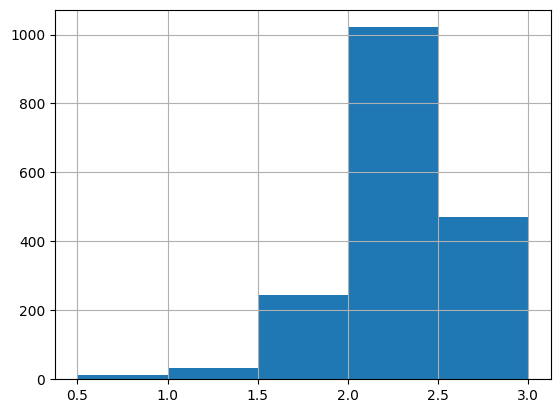

In [19]:
# 1-8
# 9:all sets combined
texts, scores = select_set(dataframe,1)
get_hist_avg(scores,5)
X_train, X_test, y_train, y_test, data = data_prepare(texts,scores)

# **Regression Analysis**

Testing for Linear Regression 

Mean squared error: 0.04501437384270856
Mean squared error in percentage: 1.5004791280902854
Variance score: 0.7134352182307053
Testing for Adaboost Regression 

Mean squared error: 0.04450911613048784
Mean squared error in percentage: 1.4836372043495947
Variance score: 0.7166517256188947


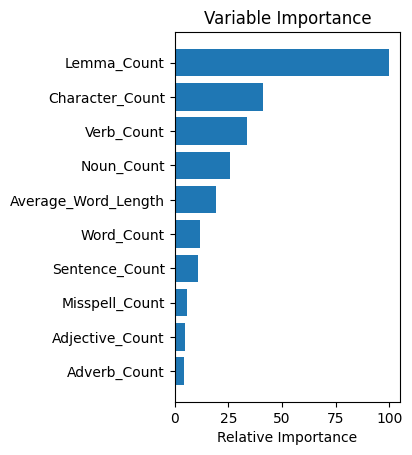

In [20]:
print('Testing for Linear Regression \n')
lin_regression(X_train,y_train,X_test,y_test)
print('Testing for Adaboost Regression \n')
adaBoost_reg(X_train,y_train,X_test,y_test)

# **Dataset Selection 2**

In [21]:
# 1-8
# 9:all sets combined
texts, scores = select_set_classification(dataframe,1)
X_train, X_test, y_train, y_test, data = data_prepare(texts,scores)

False
True


# **Classification Analysis**

In [22]:
a=[0.1,1,10,100,500,1000]
for b in a:
    clf = svm.SVC(C=b, gamma=0.00001)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print (b)
    print (clf.score(X_test,y_test))
    print (np.mean(cross_val_score(clf, X_train, y_train, cv=3)))

0.1
0.7831775700934579
0.7764423076923078
1
0.788785046728972
0.78125
10
0.794392523364486
0.7948717948717948
100
0.7962616822429907
0.794871794871795
500
0.7925233644859813
0.7892628205128206
1000
0.7850467289719626
0.782852564102564


In [23]:
clf = svm.SVC(C=100, gamma=0.00001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Cohen’s kappa score: {}'.format(cohen_kappa_score(y_test,y_pred)))

Cohen’s kappa score: 0.6327261963244278


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        79
           1       0.80      0.87      0.83       307
           2       0.80      0.69      0.74       149

    accuracy                           0.80       535
   macro avg       0.80      0.76      0.78       535
weighted avg       0.80      0.80      0.79       535



# **Data Analysis**

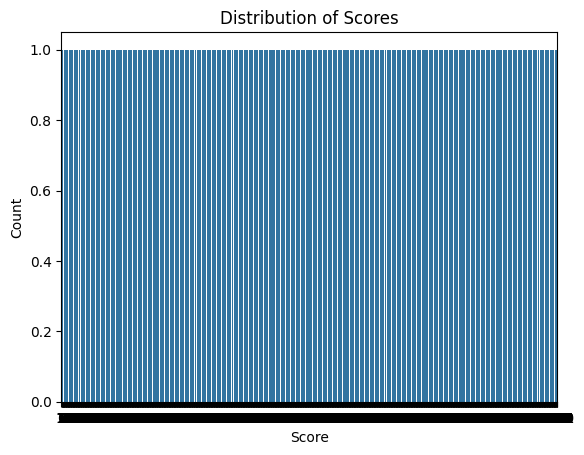

In [25]:
# Count plot for scores
sns.countplot(scores)
plt.title("Distribution of Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

In [26]:
# Plotting score distributions with respect to different features
def plot_score_distribution_by_feature(data, scores, feature_name, xlabel):
    zero = data[(data[feature_name] > 0) & (scores == 0)]
    one = data[(data[feature_name] > 0) & (scores == 1)]
    two = data[(data[feature_name] > 0) & (scores == 2)]

    sns.distplot(zero[feature_name], bins=10, color='r', label='Score 0')
    sns.distplot(one[feature_name], bins=10, color='g', label='Score 1')
    sns.distplot(two[feature_name], bins=10, color='b', label='Score 2')

    plt.title(f"Score Distribution with respect to {feature_name}")
    plt.xlabel(xlabel)
    plt.ylabel("Distribution of Scores")
    plt.legend()
    plt.show()

<ipython-input-26-457e4d892a7d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero[feature_name], bins=10, color='r', label='Score 0')
<ipython-input-26-457e4d892a7d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(one[feature_name], bins=10, color='g', label='Score 1')
<ipython-input-26-457

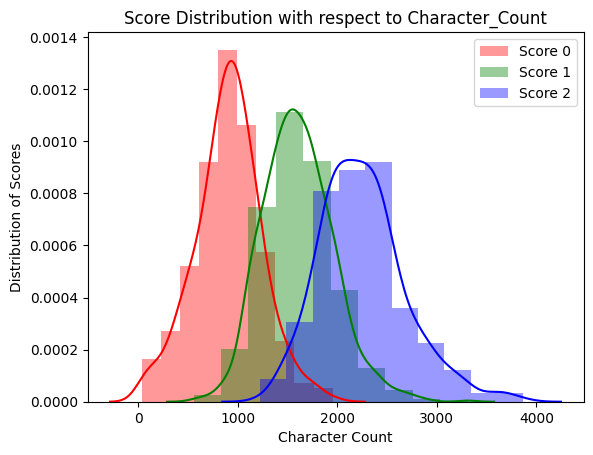

<ipython-input-26-457e4d892a7d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero[feature_name], bins=10, color='r', label='Score 0')
<ipython-input-26-457e4d892a7d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(one[feature_name], bins=10, color='g', label='Score 1')
<ipython-input-26-457

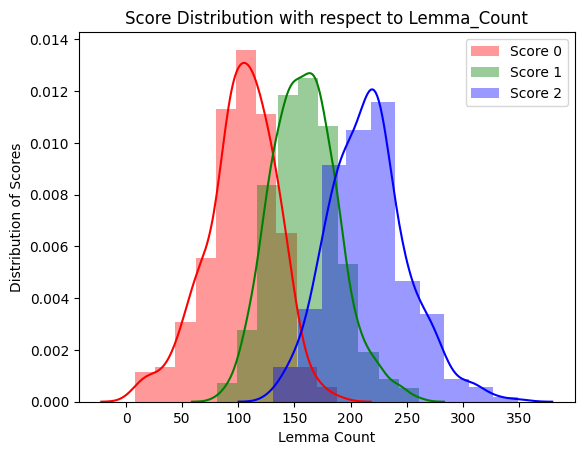

In [27]:
# Plot score distributions for different features
plot_score_distribution_by_feature(data, scores, "Character_Count", "Character Count")
plot_score_distribution_by_feature(data, scores, "Lemma_Count", "Lemma Count")

<ipython-input-26-457e4d892a7d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero[feature_name], bins=10, color='r', label='Score 0')
<ipython-input-26-457e4d892a7d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(one[feature_name], bins=10, color='g', label='Score 1')
<ipython-input-26-457

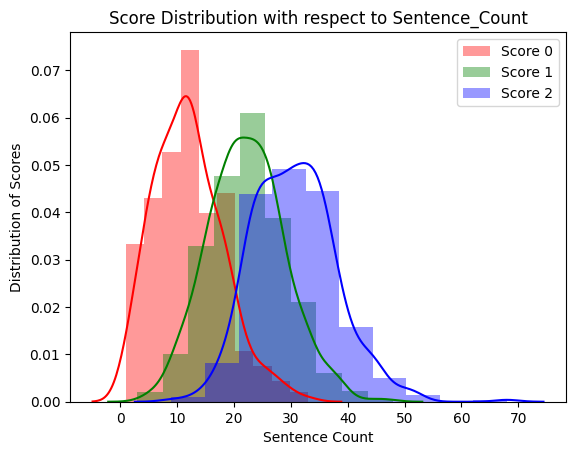

<ipython-input-26-457e4d892a7d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero[feature_name], bins=10, color='r', label='Score 0')
<ipython-input-26-457e4d892a7d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(one[feature_name], bins=10, color='g', label='Score 1')
<ipython-input-26-457

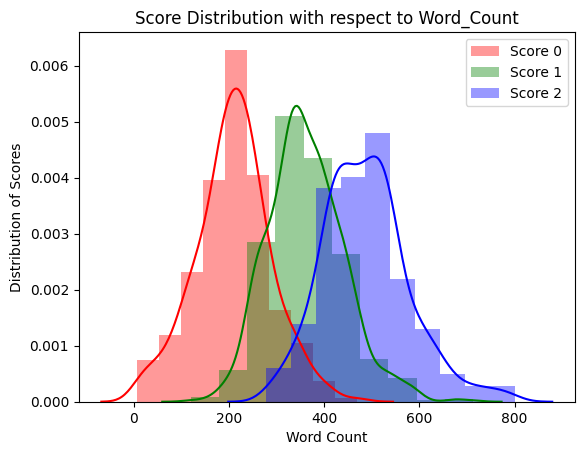

In [28]:
plot_score_distribution_by_feature(data, scores, "Sentence_Count", "Sentence Count")
plot_score_distribution_by_feature(data, scores, "Word_Count", "Word Count")

<ipython-input-26-457e4d892a7d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero[feature_name], bins=10, color='r', label='Score 0')
<ipython-input-26-457e4d892a7d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(one[feature_name], bins=10, color='g', label='Score 1')
<ipython-input-26-457

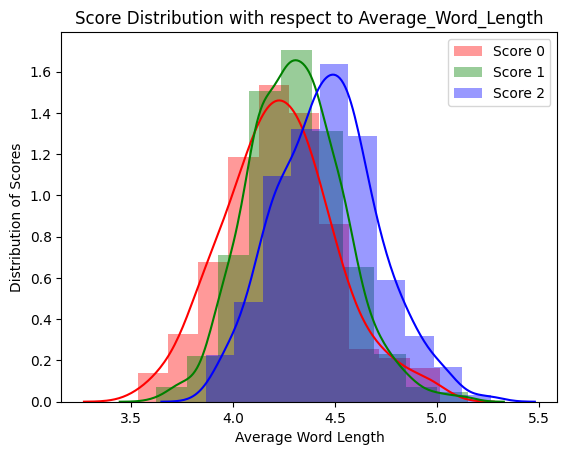

In [29]:
plot_score_distribution_by_feature(data, scores, "Average_Word_Length", "Average Word Length")

**Kappa Score Reliability**

In Cohen's initial publication, he categorized Cohen's kappa values differently. Values equal to or less than 0 indicate no agreement, while those between 0.01 and 0.20 suggest none to slight agreement, 0.21–0.40 indicate fair agreement, 0.41–0.60 denote moderate agreement, 0.61–0.80 represent substantial agreement, and 0.81–1.00 signify almost perfect agreement. McHugh notes that several sources advise 80% agreement as the minimum acceptable level of interrater agreement.

# **Latent Semantic Analysis**

In [30]:
# Import necessary libraries for LSA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [31]:
# Function to preprocess the text data
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)

In [32]:
# Preprocess essays
dataframe['processed_essay'] = dataframe['essay'].apply(preprocess_text)

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the processed essays
tfidf_matrix = tfidf_vectorizer.fit_transform(dataframe['processed_essay'])

# Number of topics/components to extract via SVD
num_topics = 100

# Create a TruncatedSVD object
svd_model = TruncatedSVD(n_components=num_topics)

# Fit and transform the TF-IDF matrix
lsa_topics = svd_model.fit_transform(tfidf_matrix)

# Display the shape of the resulting matrix
print('Shape of LSA topic matrix:', lsa_topics.shape)

Shape of LSA topic matrix: (12976, 100)


Mean Squared Error: 6.6727342190247025
R^2 Score: 0.9142959704413365


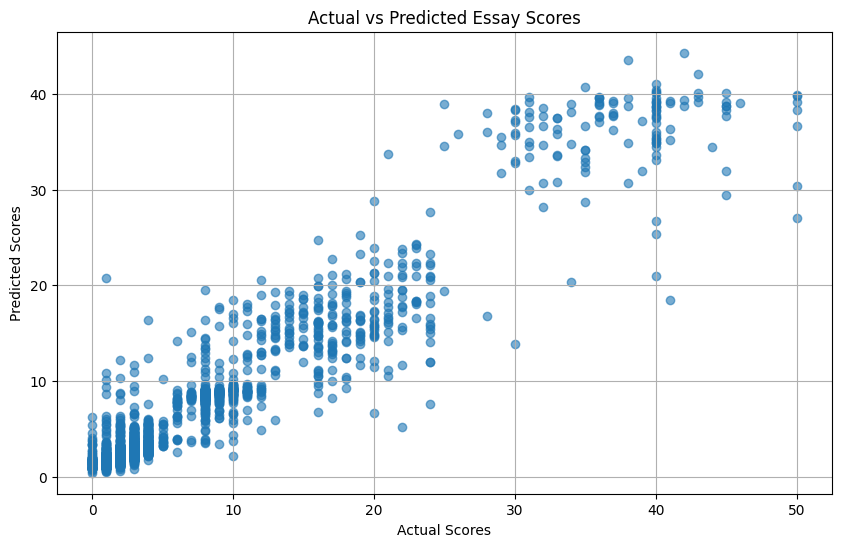

In [33]:
# Import additional necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create a predictive model using Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lsa_topics, dataframe['domain1_score'], test_size=0.2, random_state=42)

# Fit the model
gbr.fit(X_train, y_train)

# Predict on the testing set
y_pred = gbr.predict(X_test)

# Calculate and print the performance metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plotting actual vs predicted scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Essay Scores')
plt.grid(True)
plt.show()

**The MSE of approximately 6.67 and the R^2 Score of approximately 0.91 indicate that the model performs well in predicting essay scores based on the LSA topics.**

**The Automated Essay Scoring system can be made more accurate and robust by including new features and methods.This can be achieved by highlighting key features or parts of the essay that contributed significantly to its score.**

In [34]:
# Code to integrate interactive feedback based on feature importance
def generate_feedback(essay, model, vectorizer, top_k=5):
    # Get feature importance from the model
    importances = model.feature_importances_
    # Get feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    # Sort features by importance
    important_indices = importances.argsort()[::-1][:top_k]
    important_words = [feature_names[idx] for idx in important_indices]

    # Generate feedback message
    feedback = "Key points affecting the essay score: " + ", ".join(important_words)

    # Highlight important words in the essay
    highlighted_essay = essay
    for word in important_words:
        highlighted_essay = highlighted_essay.replace(word, f"**{word}**")

    return highlighted_essay, feedback

# Example usage in workflow
example_essay = dataframe.iloc[0]['essay']
highlighted_essay, feedback = generate_feedback(example_essay, gbr, tfidf_vectorizer)

print("Highlighted Essay:\n", highlighted_essay)
print("Feedback:\n", feedback)

Highlighted Essay:
 Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so questi

**The output includes the highlighted essay text with important words emphasized and the feedback message indicating the key points affecting the essay score based on feature importance.**

# **Text Embeddings**

In [35]:
# Import necessary libraries
from gensim.models import Word2Vec
import numpy as np
import nltk

# Function to train Word2Vec embeddings
def train_word2vec_embeddings(texts):
    # Tokenize essays into sentences
    tokenized_sentences = [nltk.word_tokenize(essay) for essay in texts]

    # Train Word2Vec model
    w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

    return w2v_model

# Train Word2Vec embeddings on the essay texts
word2vec_model = train_word2vec_embeddings(dataframe['essay'])

# Function to convert essays into averaged Word2Vec embeddings
def essays_to_word2vec_embeddings(texts, word2vec_model):
    # Tokenize essays into sentences
    tokenized_sentences = [nltk.word_tokenize(essay) for essay in texts]

    # Initialize an empty array to store essay embeddings
    essay_embeddings = []

    # Convert each essay into an averaged Word2Vec embedding
    for sentence in tokenized_sentences:
        # Initialize an empty array to store word embeddings for the current sentence
        sentence_embeddings = []
        # Calculate Word2Vec embedding for each word in the sentence
        for word in sentence:
            try:
                word_embedding = word2vec_model.wv[word]
                sentence_embeddings.append(word_embedding)
            except KeyError:
                # If the word is not in the vocabulary, skip it
                pass
        # Calculate average embedding for the sentence
        if sentence_embeddings:
            sentence_avg_embedding = np.mean(sentence_embeddings, axis=0)
            essay_embeddings.append(sentence_avg_embedding)

    # Convert list of embeddings into numpy array
    essay_embeddings = np.array(essay_embeddings)

    return essay_embeddings

# Convert a subset of essays into Word2Vec embeddings and print the results
subset_texts = dataframe['essay'][:3]  # Selecting the first 3 essays as a subset

# Convert essays into averaged Word2Vec embeddings
subset_embeddings = essays_to_word2vec_embeddings(subset_texts, word2vec_model)

# Print the essay texts and their corresponding Word2Vec embeddings
for i, essay in enumerate(subset_texts):
    print("Essay Text:")
    print(essay)
    print("Word2Vec Embedding:")
    print(subset_embeddings[i])
    print()

Essay Text:
Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about

**The output of the code consists of the essay texts and their corresponding Word2Vec embeddings.The output for each essay includes the essay text followed by the Word2Vec embedding vector representing the semantic content of the essay.**